In [2]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 39 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 0s (34.8 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 160772 files and di

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 

In [2]:
bitcoin = pd.read_csv("BTC-USD(2021.06.02).csv")
bitcoin.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-02,10162.973633,10182.340820,9460.571289,9529.803711,9529.803711,3.913725e+10
1,2020-06-03,9533.760742,9682.859375,9471.846680,9656.717773,9656.717773,2.500746e+10
2,2020-06-04,9655.854492,9887.610352,9525.247070,9800.636719,9800.636719,2.592181e+10
3,2020-06-05,9800.215820,9869.237305,9663.216797,9665.533203,9665.533203,2.350963e+10
4,2020-06-06,9664.904297,9773.431641,9591.024414,9653.679688,9653.679688,2.043842e+10


In [3]:
bitcoin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       366 non-null    object 
 1   Open       363 non-null    float64
 2   High       363 non-null    float64
 3   Low        363 non-null    float64
 4   Close      363 non-null    float64
 5   Adj Close  363 non-null    float64
 6   Volume     363 non-null    float64
dtypes: float64(6), object(1)
memory usage: 20.1+ KB


In [4]:
# 컬럼명 변경
bitcoin.rename(columns = {"Adj Close": "Adj_Close"}, inplace = True)
bitcoin.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')

In [5]:
import matplotlib.ticker as ticker

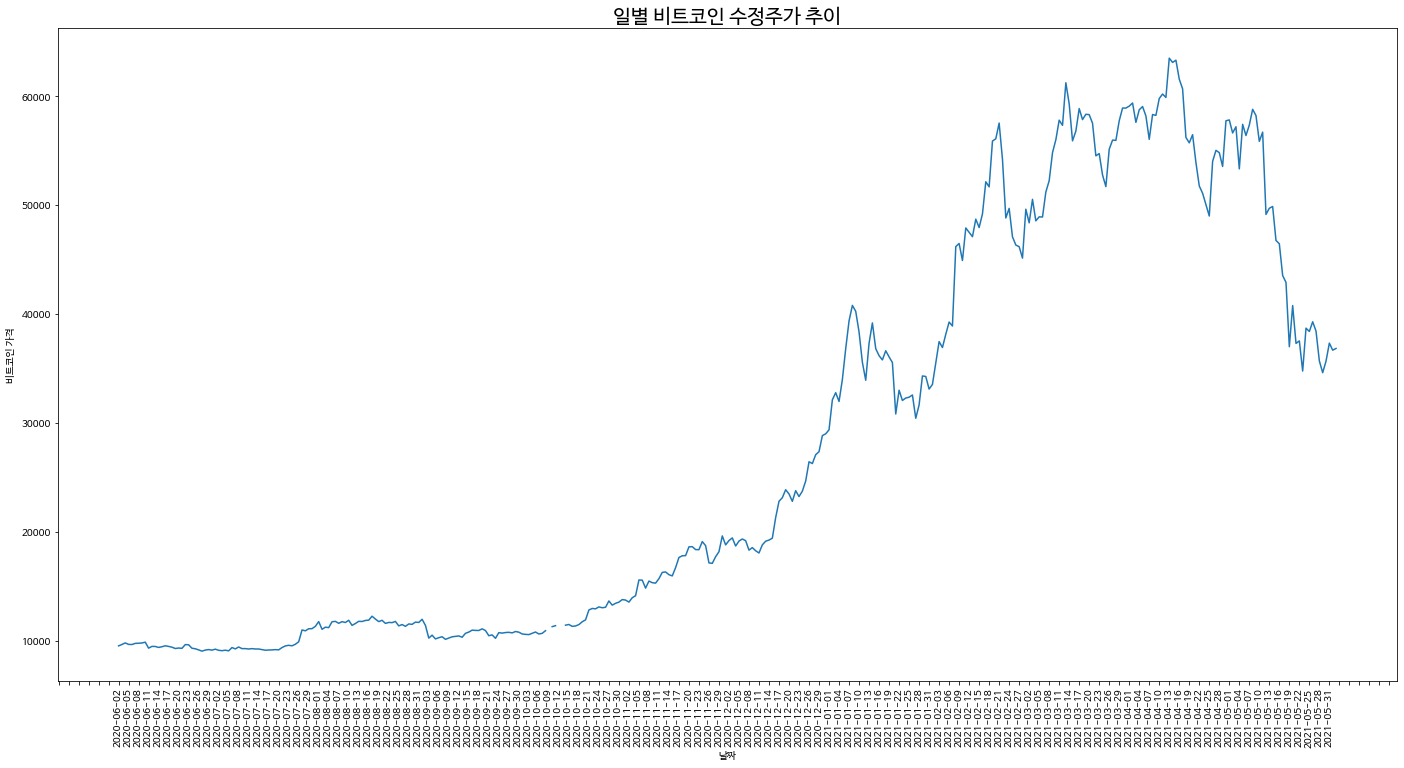

In [6]:
# 수정주가 시각화
plt.figure(figsize=(24,12))
plt.plot(bitcoin.Date, bitcoin.Adj_Close)
plt.xticks(rotation=90)
plt.title("일별 비트코인 수정주가 추이", fontsize = 20)
plt.xlabel("날짜")
plt.ylabel("비트코인 가격")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # 3일 간격으로 보여줌

In [7]:
import math
import numpy as np
# 수정주가 차분
bitcoin_return = []
bitcoin_return.append(0) # 0번째 인덱스는 안쓰니까 임의로 아무 숫자 넣어줌
buf = bitcoin.Adj_Close # buf 변수에 할당
size = len(buf) # buf 길이 변수 선언
for i in range(1, size): # 수익률 계산
  result = np.log(buf[i]/buf[i-1])
  bitcoin_return.append(result)

bitcoin_return = pd.DataFrame(bitcoin_return) 
bitcoin_return.head()

,0
0,0.000000
1,0.013230
2,0.014794
3,-0.013881
4,-0.001227


In [8]:
bitcoin["BTC_r"] = bitcoin_return
bitcoin.head()

,Date,Open,High,Low,Close,Adj_Close,Volume,BTC_r
0,2020-06-02,10162.973633,10182.340820,9460.571289,9529.803711,9529.803711,3.913725e+10,0.000000
1,2020-06-03,9533.760742,9682.859375,9471.846680,9656.717773,9656.717773,2.500746e+10,0.013230
2,2020-06-04,9655.854492,9887.610352,9525.247070,9800.636719,9800.636719,2.592181e+10,0.014794
3,2020-06-05,9800.215820,9869.237305,9663.216797,9665.533203,9665.533203,2.350963e+10,-0.013881
4,2020-06-06,9664.904297,9773.431641,9591.024414,9653.679688,9653.679688,2.043842e+10,-0.001227


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


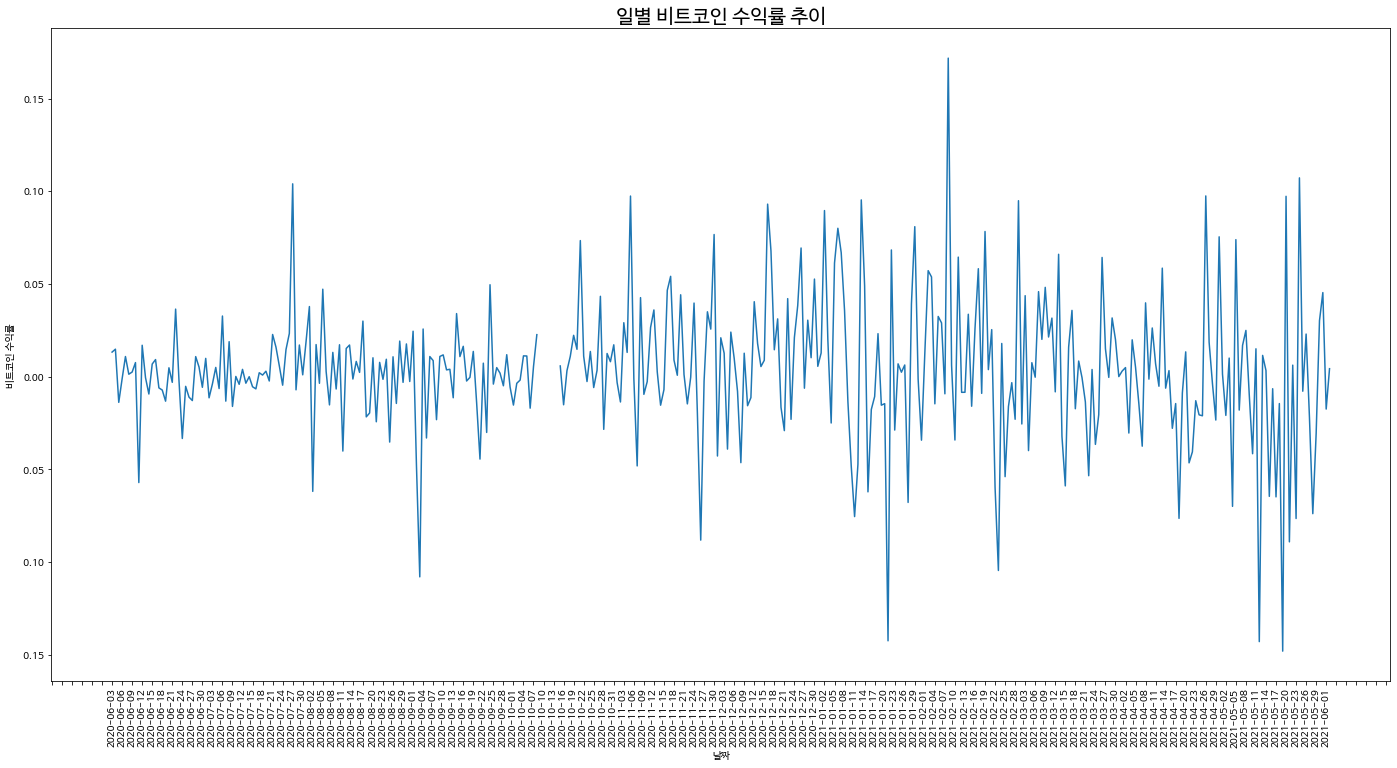

In [9]:
# 수익률 시각화
plt.figure(figsize=(24,12))
plt.plot(bitcoin.Date[1:], bitcoin.BTC_r[1:])
plt.xticks(rotation=90)
plt.title("일별 비트코인 수익률 추이", fontsize = 20)
plt.xlabel("날짜")
plt.ylabel("비트코인 수익률")
ax=plt.gca()
ax.xaxis.set_major_locator(ticker.MultipleLocator(3)) # 3일 간격으로 보여줌

Text(0, 0.5, '내일의 비트코인 수익률')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


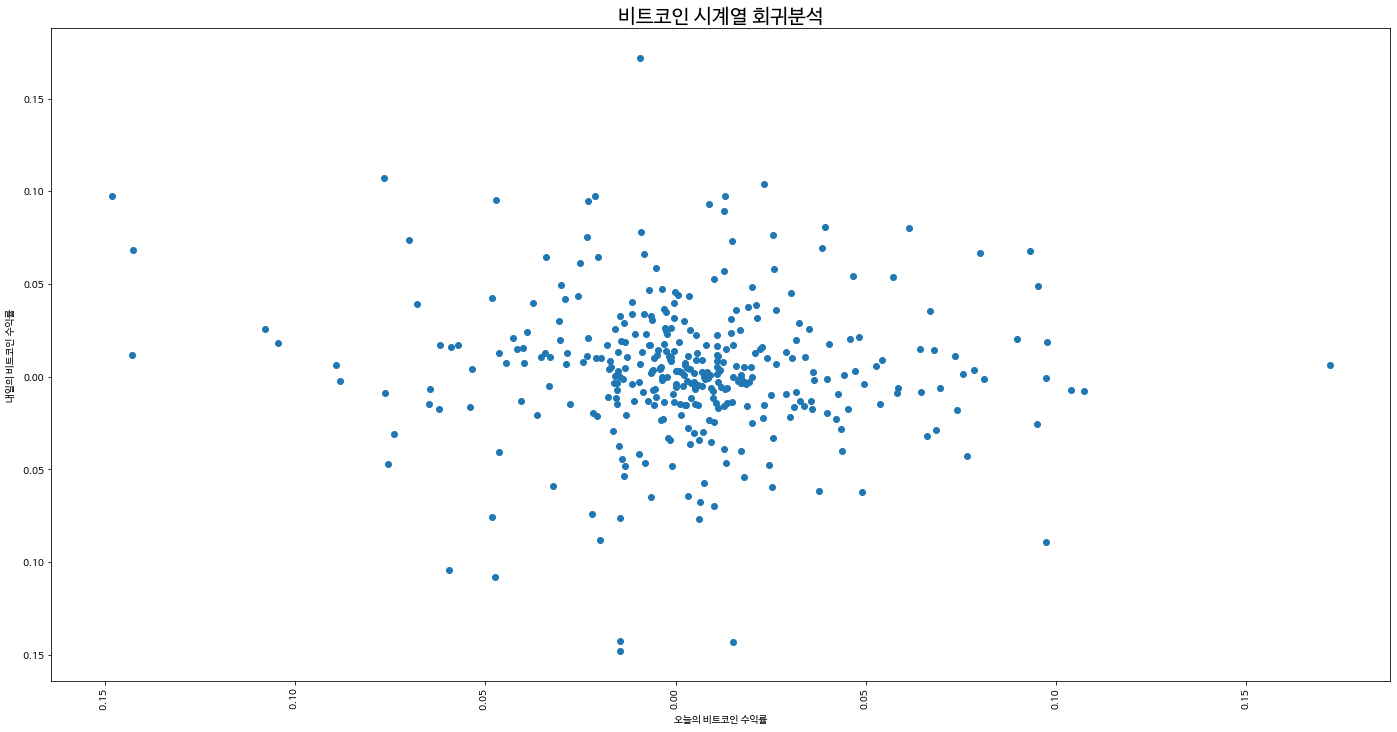

In [10]:
# 시계열 산점도
plt.figure(figsize=(24,12))
plt.scatter(bitcoin.BTC_r[1:size-1], bitcoin.BTC_r[2:])
plt.xticks(rotation=90)
plt.title("비트코인 시계열 회귀분석", fontsize = 20)
plt.xlabel("오늘의 비트코인 수익률")
plt.ylabel("내일의 비트코인 수익률")

In [11]:
from statsmodels.formula.api import ols
from sklearn.linear_model import LinearRegression

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [12]:
bitcoin_cpy = {"today":bitcoin.BTC_r[1:size-1], "tomorrow":bitcoin.BTC_r[2:]}
bitcoin_cpy = pd.DataFrame(bitcoin_cpy)
bitcoin_cpy

,today,tomorrow
1,0.013230,NaN
2,0.014794,0.014794
3,-0.013881,-0.013881
4,-0.001227,-0.001227
5,0.010836,0.010836
...,...,...
361,-0.030766,-0.030766
362,0.030220,0.030220
363,0.045336,0.045336
364,-0.017508,-0.017508


In [13]:
length = len(bitcoin_cpy)
for i in range(length-1):
  bitcoin_cpy.tomorrow[i] = bitcoin_cpy.tomorrow[i+1]
bitcoin_cpy

,today,tomorrow
1,0.013230,0.014794
2,0.014794,-0.013881
3,-0.013881,-0.001227
4,-0.001227,0.010836
5,0.010836,0.001294
...,...,...
361,-0.030766,0.030220
362,0.030220,0.045336
363,0.045336,-0.017508
364,-0.017508,-0.017508


In [14]:
bitcoin_cpy.isnull().sum()

today       6
tomorrow    5
dtype: int64

In [15]:
btc_buf = bitcoin_cpy
btc_buf = btc_buf.dropna()
btc_buf.isnull().sum()

today       0
tomorrow    0
dtype: int64

In [16]:
model = ols('tomorrow ~ today',data=btc_buf).fit() 

In [17]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               tomorrow   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.478
Date:                Wed, 23 Jun 2021   Prob (F-statistic):              0.225
Time:                        00:39:16   Log-Likelihood:                 664.97
No. Observations:                 357   AIC:                            -1326.
Df Residuals:                     355   BIC:                            -1318.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0038      0.002      1.886      0.060      -0.000       0.008
today         -0.0644      0.053     -1.216      0.225      -0.169       0.040
==============================================================================
Omnibus:                       31.968   Durbin-Watson:                   1.991
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              138.503
Skew:                          -0.146   Prob(JB):                     8.40e-31
Kurtosis:                       6.037   Cond. No.                         26.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [18]:
print(model.params.Intercept) # 절편
print(model.params.today)  # 기울기

0.003777795498201522
-0.06443818390127506


In [19]:
model.fittedvalues # 추정값

1      0.002925
2      0.002825
3      0.004672
4      0.003857
5      0.003080
         ...   
360    0.008542
361    0.005760
362    0.001830
363    0.000856
364    0.004906
Length: 357, dtype: float64

In [20]:
model.resid # 잔차

1      0.011868
2     -0.016706
3     -0.005899
4      0.006979
5     -0.001786
         ...   
360   -0.039308
361    0.024460
362    0.043505
363   -0.018364
364   -0.022414
Length: 357, dtype: float64

Text(0, 0.5, '내일의 비트코인 수익률')

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


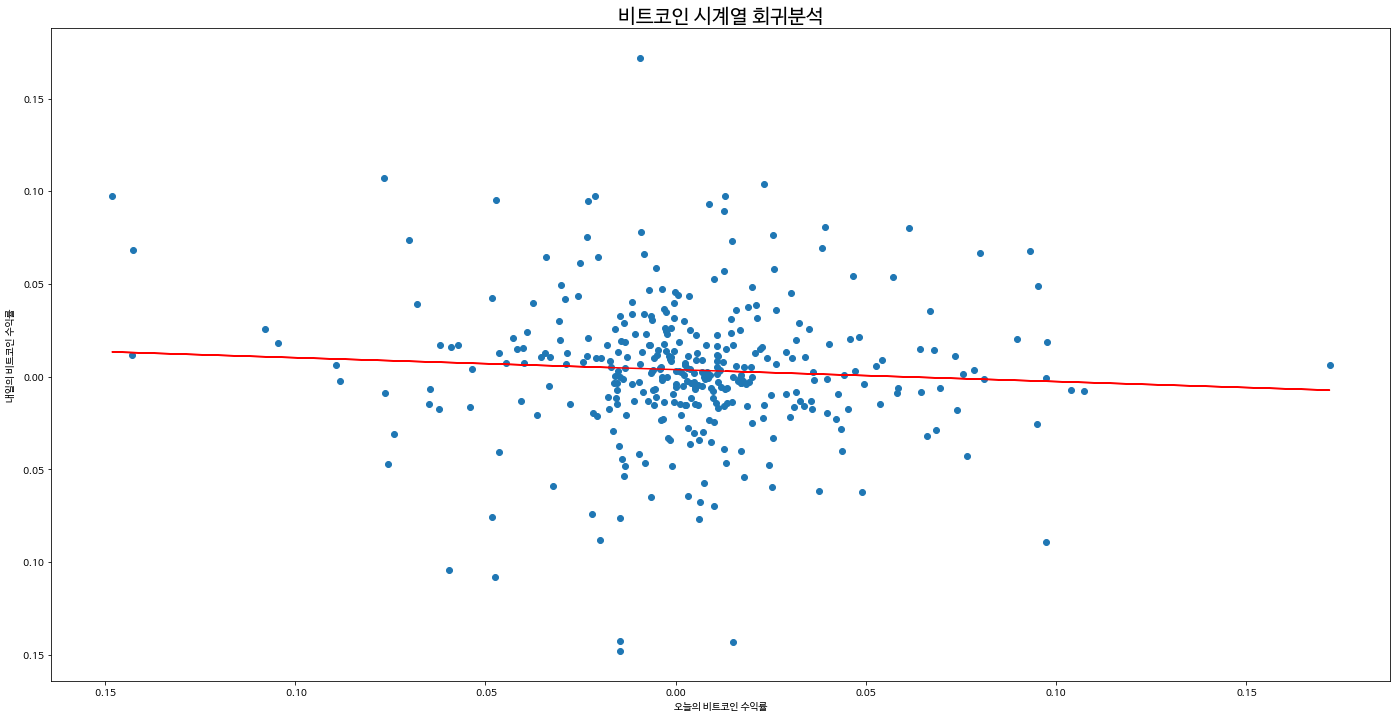

In [21]:
# 시계열 회귀분석 시각화
plt.figure(figsize=(24,12))
plt.scatter(btc_buf.today, btc_buf.tomorrow)
plt.plot(btc_buf.today, model.fittedvalues, color="red")
plt.title("비트코인 시계열 회귀분석", fontsize = 20)
plt.xlabel("오늘의 비트코인 수익률")
plt.ylabel("내일의 비트코인 수익률")

In [22]:
# 회귀분석 결과 비트코인의 움직임은 거의 랜덤하다. -- 지난 1년치만 보았을 때
# 비트코인에 투자하는 것은 도박과 마찬가지이다.